# EDA
This notebook ... 

In [31]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime




In [32]:
# Load the cleaned master dataset
project_root = os.path.dirname(os.getcwd())
clean_path = os.path.join(project_root, "data_cleaned")
df = pd.read_parquet(os.path.join(clean_path, "master.parquet"))

print("Dataset shape:", df.shape)
print("\nColumns available:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())

Dataset shape: (3000, 25)

Columns available:
['ID_Venta', 'Fecha', 'ID_Cliente', 'ID_Producto', 'Cantidad', 'Método_Pago', 'Estado', 'Nombre', 'Apellido', 'Email', 'Fecha_Resgistro', 'Región', 'Nombre_producto', 'Categoría', 'Precio_Unitario', 'Stock', 'ID_Categoria', 'Descripción_x', 'ID_Metodo', 'Método', 'Descripción_y', 'anio', 'mes', 'semana', 'ingreso']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_Venta         3000 non-null   int64         
 1   Fecha            3000 non-null   datetime64[ns]
 2   ID_Cliente       3000 non-null   int64         
 3   ID_Producto      3000 non-null   int64         
 4   Cantidad         3000 non-null   int64         
 5   Método_Pago      3000 non-null   int64         
 6   Estado           3000 non-null   object        
 7   Nombre           3000 non-null   

In [33]:
# Inspección básica del dataset

print("DATASET OVERVIEW")


print(f"Shape: {df.shape}")



print("MISSING VALUES")

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])


DATASET OVERVIEW
Shape: (3000, 25)
MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [34]:
print("SAMPLE DATA")
df.head()

SAMPLE DATA


,ID_Venta,Fecha,ID_Cliente,ID_Producto,Cantidad,Método_Pago,Estado,Nombre,Apellido,Email,...,Stock,ID_Categoria,Descripción_x,ID_Metodo,Método,Descripción_y,anio,mes,semana,ingreso
0,919,2024-01-31,10,25,5,1,Completa,Stephenie,Sexty,ssexty9@domainmarket.com,...,1640,5,"Productos congelados, como papas fritas, empan...",1,Efectivo,"Pago en dinero en efectivo, sin intermediarios...",2024,1,5,77.25
1,947,2024-01-31,106,5,1,4,Completa,Benedikta,Condon,bcondon2x@paypal.com,...,4929,1,"Productos lácteos frescos y procesados, como l...",4,Mercado Pago,Plataforma de pagos online que permite realiza...,2024,1,5,5.65
2,1317,2024-01-31,235,25,3,3,Completa,Cloe,Brun,cbrun6i@theglobeandmail.com,...,1640,5,"Productos congelados, como papas fritas, empan...",3,Tarjeta de Débito,Pago con tarjetas que debitán directamente de ...,2024,1,5,46.35
3,1607,2024-01-31,114,15,5,1,Completa,Fabien,Roskam,froskam35@desdev.cn,...,4043,3,"Productos horneados frescos, como pan, factura...",1,Efectivo,"Pago en dinero en efectivo, sin intermediarios...",2024,1,5,17.55
4,2038,2024-01-31,132,2,5,4,Completa,Cassie,Corish,ccorish3n@virginia.edu,...,3358,1,"Productos lácteos frescos y procesados, como l...",4,Mercado Pago,Plataforma de pagos online que permite realiza...,2024,1,5,26.05


In [35]:
# Estadísticas descriptivas
print("NUMERICAL VARIABLES SUMMARY")

print(df.describe())



NUMERICAL VARIABLES SUMMARY
          ID_Venta                Fecha   ID_Cliente  ID_Producto  \
count  3000.000000                 3000  3000.000000  3000.000000   
mean   1500.500000  2024-07-15 16:50:24   162.302333    19.668667   
min       1.000000  2024-01-31 00:00:00     1.000000     1.000000   
25%     750.750000  2024-04-26 00:00:00    79.000000    10.000000   
50%    1500.500000  2024-07-12 12:00:00   162.000000    20.000000   
75%    2250.250000  2024-10-06 00:00:00   244.000000    29.000000   
max    3000.000000  2024-12-30 00:00:00   326.000000    38.000000   
std     866.169729                  NaN    94.368925    10.995841   

          Cantidad  Método_Pago                Fecha_Resgistro  \
count  3000.000000  3000.000000                           3000   
mean      3.480333     3.362667  2023-08-11 23:45:35.999999744   
min       1.000000     1.000000            2023-03-19 00:00:00   
25%       2.000000     2.000000            2023-05-26 00:00:00   
50%       3.000000  

In [36]:

print("CATEGORICAL VARIABLES SUMMARY")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Top values:\n{df[col].value_counts().head()}")

CATEGORICAL VARIABLES SUMMARY

--- Estado ---
Unique values: 3
Top values:
Estado
Completa     2523
Pendiente     467
Cancelada      10
Name: count, dtype: int64

--- Nombre ---
Unique values: 316
Top values:
Nombre
Nikki     23
Benito    22
Eben      21
Gay       21
Pippy     20
Name: count, dtype: int64

--- Apellido ---
Unique values: 325
Top values:
Apellido
Kennermann    20
Elcombe       19
Condon        19
Ianelli       17
Mccaull       16
Name: count, dtype: int64

--- Email ---
Unique values: 326
Top values:
Email
selcombe8i@ustream.tv                19
bcondon2x@paypal.com                 19
jianelli54@networkadvertising.org    17
ldungey46@comcast.net                16
pstollsteiner2h@hostgator.com        16
Name: count, dtype: int64

--- Región ---
Unique values: 6
Top values:
Región
Buenos Aires    1032
Centro           601
Patagonia        553
Cuyo             403
NEA              348
Name: count, dtype: int64

--- Nombre_producto ---
Unique values: 38
Top values:
Nombre_p

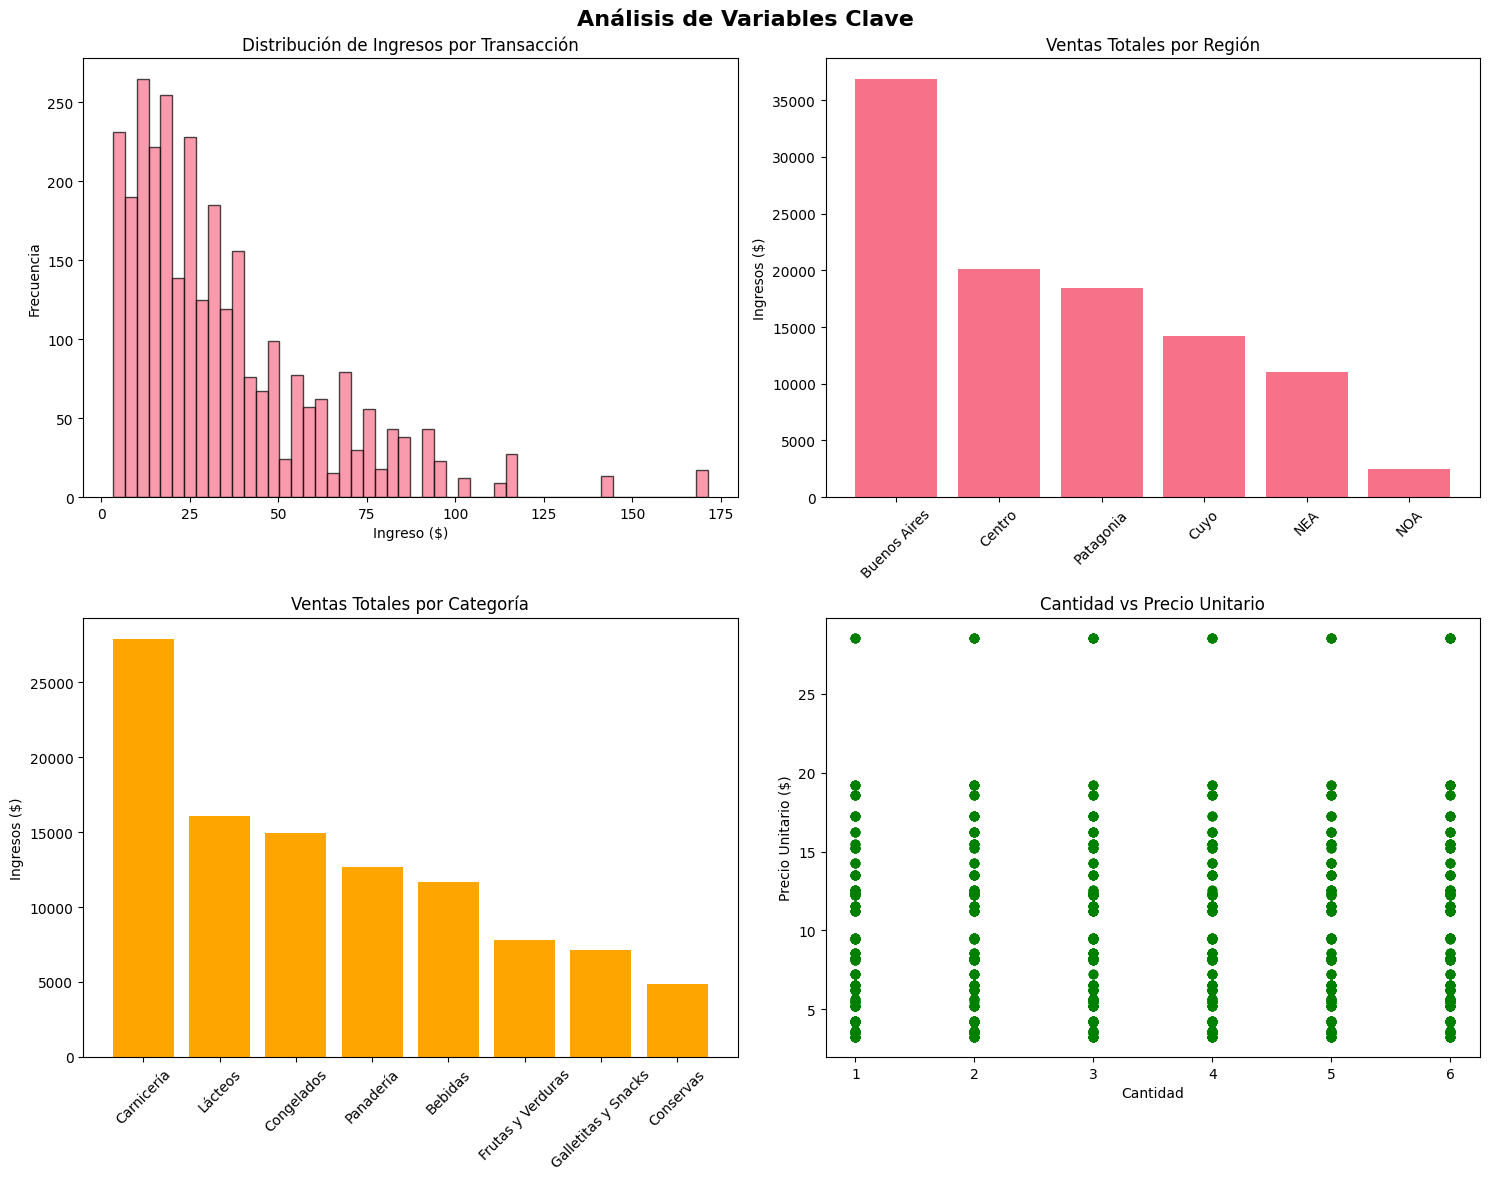

ESTADÍSTICAS DE VARIABLES CLAVE
Ingreso total: $103,103.19
Ingreso promedio por transacción: $34.37
Ingreso mediano: $26.16
Número total de transacciones: 3,000
Período de análisis: 2024-01-31 00:00:00 a 2024-12-30 00:00:00


In [37]:
# Análisis de variables de negocio principales
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Variables Clave', fontsize=16, fontweight='bold')

# 1. Distribución de ingresos
axes[0,0].hist(df['ingreso'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribución de Ingresos por Transacción')
axes[0,0].set_xlabel('Ingreso ($)')
axes[0,0].set_ylabel('Frecuencia')

# 2. Ventas por región
region_sales = df.groupby('Región')['ingreso'].sum().sort_values(ascending=False)
axes[0,1].bar(region_sales.index, region_sales.values)
axes[0,1].set_title('Ventas Totales por Región')
axes[0,1].set_ylabel('Ingresos ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Ventas por categoría
cat_sales = df.groupby('Categoría')['ingreso'].sum().sort_values(ascending=False)
axes[1,0].bar(cat_sales.index, cat_sales.values, color='orange')
axes[1,0].set_title('Ventas Totales por Categoría')
axes[1,0].set_ylabel('Ingresos ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Cantidad vs Precio
axes[1,1].scatter(df['Cantidad'], df['Precio_Unitario'], alpha=0.6, color='green')
axes[1,1].set_title('Cantidad vs Precio Unitario')
axes[1,1].set_xlabel('Cantidad')
axes[1,1].set_ylabel('Precio Unitario ($)')

plt.tight_layout()
plt.show()

# Estadísticas de las variables principales
print("=" * 50)
print("ESTADÍSTICAS DE VARIABLES CLAVE")
print("=" * 50)
print(f"Ingreso total: ${df['ingreso'].sum():,.2f}")
print(f"Ingreso promedio por transacción: ${df['ingreso'].mean():.2f}")
print(f"Ingreso mediano: ${df['ingreso'].median():.2f}")
print(f"Número total de transacciones: {len(df):,}")
print(f"Período de análisis: {df['Fecha'].min()} a {df['Fecha'].max()}")

### 1. Análisis de Variables Clave

**Distribución de Ingresos por Transacción:**
La distribución muestra una concentración alta de transacciones en el rango de $10-40, con una cola larga hacia valores superiores. La mayoría de las compras son de bajo monto, típico del comportamiento de supermercados donde predominan las compras básicas diarias.

**Ventas Totales por Región:**
Buenos Aires domina claramente el mercado con ingresos superiores a $35,000, representando aproximadamente el 40% del total. Le siguen Centro y Patagonia con volúmenes similares ($20,000 y $18,000), mientras que Cuyo, NEA y NOA muestran participaciones menores pero equilibradas entre sí.

**Ventas Totales por Categoría:**
Carnicería lidera significativamente con más de $25,000 en ventas, seguida por Lácteos, Congelados, Panadería y Bebidas con volúmenes similares entre $12,000-15,000. Las categorías de Frutas y Verduras, Galletitas y Dulces, y Conservas muestran el menor rendimiento.

**Cantidad vs Precio Unitario:**
El gráfico de dispersión revela que la mayoría de las transacciones involucran cantidades de 1-3 unidades con precios que van de $2-20. No se observa una correlación clara entre cantidad comprada y precio unitario, sugiriendo comportamientos de compra independientes.


ANÁLISIS TEMPORAL


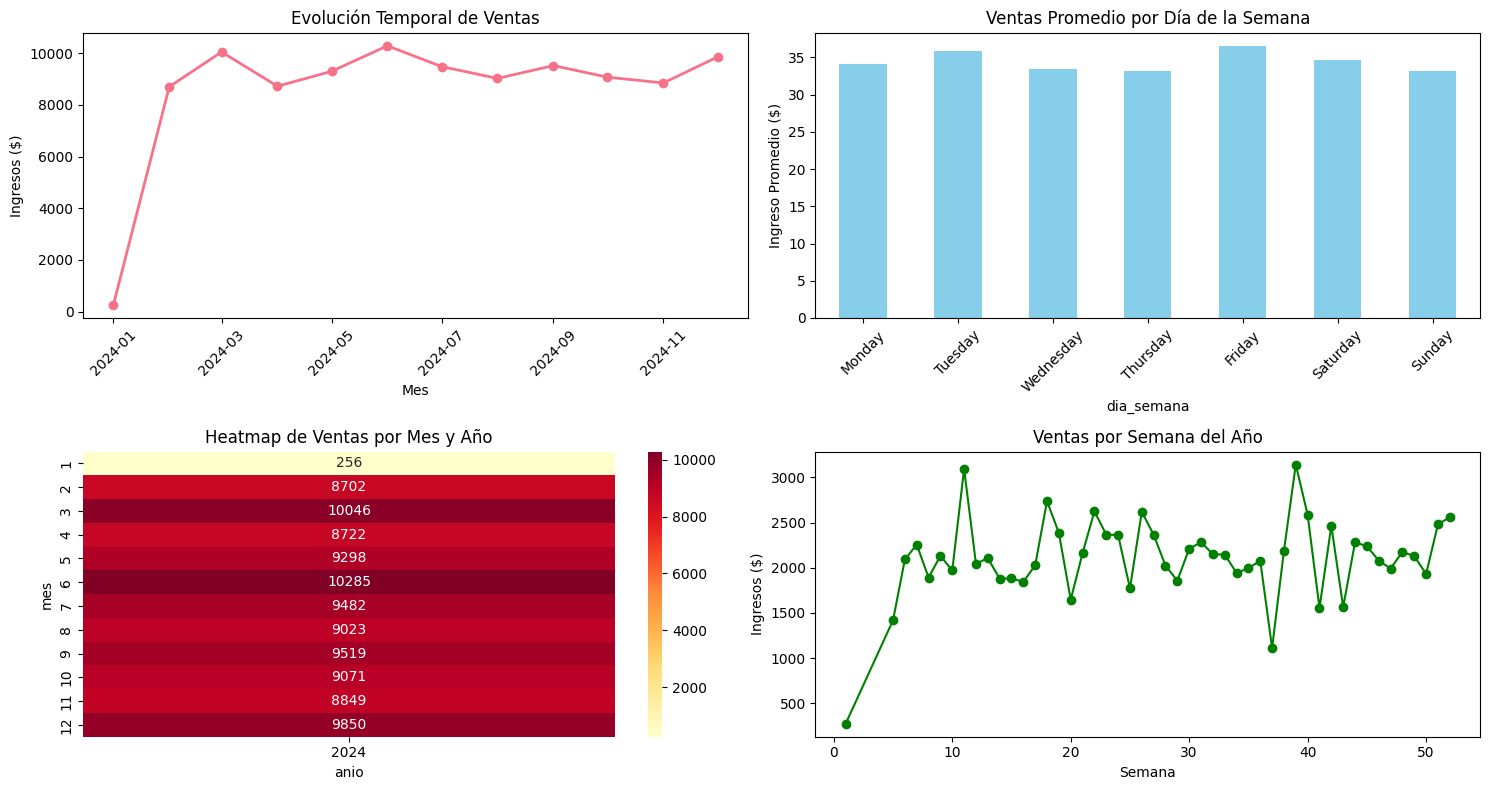

Mes con mayores ventas: 2024-06
Día de la semana con mayores ventas: Friday


In [38]:
# Análisis temporal
print("=" * 50)
print("ANÁLISIS TEMPORAL")
print("=" * 50)

# Ventas por mes - CORREGIDO
monthly_sales = df.groupby(['anio', 'mes'])['ingreso'].sum().reset_index()
# CORRECIÓN: Especificar correctamente las columnas para pd.to_datetime()
monthly_sales['fecha_mes'] = pd.to_datetime({
    'year': monthly_sales['anio'],
    'month': monthly_sales['mes'], 
    'day': 1
})
plt.figure(figsize=(15, 8))

# Subplot 1: Evolución temporal de ventas
plt.subplot(2, 2, 1)
plt.plot(monthly_sales['fecha_mes'], monthly_sales['ingreso'], marker='o', linewidth=2)
plt.title('Evolución Temporal de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)

# Subplot 2: Ventas por día de la semana
df['dia_semana'] = df['Fecha'].dt.day_name()
weekly_sales = df.groupby('dia_semana')['ingreso'].mean()
# Ordenar días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)

plt.subplot(2, 2, 2)
weekly_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Promedio por Día de la Semana')
plt.ylabel('Ingreso Promedio ($)')
plt.xticks(rotation=45)

# Subplot 3: Heatmap de ventas por mes y año
plt.subplot(2, 2, 3)
monthly_matrix = df.pivot_table(values='ingreso', index='mes', columns='anio', aggfunc='sum')
sns.heatmap(monthly_matrix, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Heatmap de Ventas por Mes y Año')

# Subplot 4: Tendencia semanal
plt.subplot(2, 2, 4)
weekly_trend = df.groupby('semana')['ingreso'].sum()
plt.plot(weekly_trend.index, weekly_trend.values, color='green', marker='o')
plt.title('Ventas por Semana del Año')
plt.xlabel('Semana')
plt.ylabel('Ingresos ($)')

plt.tight_layout()
plt.show()

# Estadísticas temporales
print(f"Mes con mayores ventas: {monthly_sales.loc[monthly_sales['ingreso'].idxmax(), 'fecha_mes'].strftime('%Y-%m')}")
print(f"Día de la semana con mayores ventas: {weekly_sales.idxmax()}")

### 2. Análisis Temporal

**Evolución Temporal de Ventas:**
Las ventas muestran un crecimiento inicial pronunciado desde enero hasta marzo 2024, estabilizándose posteriormente entre $8,000-10,000 mensuales. Junio 2024 representa el pico máximo de ventas, seguido de una ligera tendencia descendente hacia noviembre.

**Ventas Promedio por Día de la Semana:**
El comportamiento semanal es relativamente uniforme, con Friday mostrando el mayor promedio de ingresos. Monday, Wednesday y Thursday presentan los niveles más bajos, mientras que los fines de semana mantienen niveles intermedios. La variación entre días es mínima, indicando un flujo constante de clientes.

**Heatmap de Ventas por Mes y Año:**
Los meses de mayor actividad se concentran en el período marzo-junio, con junio mostrando el pico absoluto. Los primeros meses del año (enero-febrero) muestran niveles más bajos, posiblemente por el período post-navideño. La intensidad de color confirma la estacionalidad del negocio.

**Ventas por Semana del Año:**
El patrón semanal muestra alta volatilidad en las primeras semanas, estabilizándose a partir de la semana 10. Se observan picos notables alrededor de las semanas 15-20 y 25-30, con una caída marcada en la semana 40, seguida de recuperación hacia fin de año.

ANÁLISIS DE CORRELACIONES
Variables numéricas disponibles para correlación: ['Cantidad', 'Precio_Unitario', 'Stock', 'ingreso']


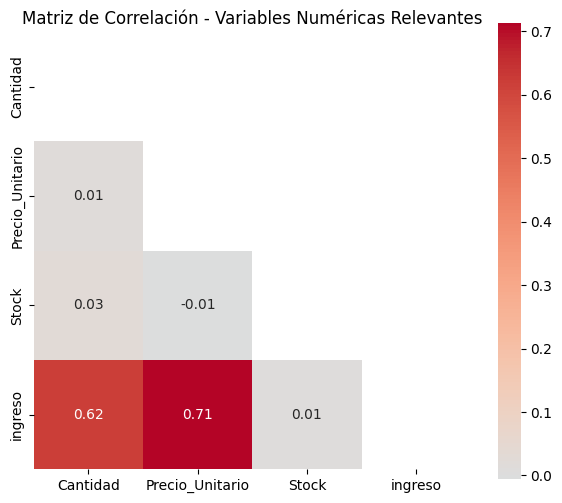


Correlaciones más fuertes con 'ingreso':
Precio_Unitario    0.713421
Cantidad           0.620143
Stock              0.011701
Name: ingreso, dtype: float64

CORRELACIONES SIGNIFICATIVAS (|r| > 0.5)
Cantidad <-> ingreso: 0.620
Precio_Unitario <-> ingreso: 0.713


In [39]:
# Matriz de correlación - CORREGIDO
print("=" * 50)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 50)

# Variables numéricas relevantes para correlación (basado en el análisis de data_cleaning)
numeric_relevant_cols = [
    'Cantidad',           # De ventas
    'Precio_Unitario',    # De productos  
    'Stock',             # De productos
    'ingreso'
]

# Verificar que todas las columnas existen en el dataset
available_cols = [col for col in numeric_relevant_cols if col in df.columns]
print(f"Variables numéricas disponibles para correlación: {available_cols}")

# Crear matriz de correlación solo con variables relevantes
correlation_matrix = df[available_cols].corr()

plt.figure(figsize=(6, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas Relevantes')
plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes con 'ingreso':")
if 'ingreso' in correlation_matrix.columns:
    ingreso_corr = correlation_matrix['ingreso'].abs().sort_values(ascending=False)
    print(ingreso_corr[ingreso_corr.index != 'ingreso'].head())
else:
    print("Variable 'ingreso' no encontrada en el dataset.")

# Análisis adicional de correlaciones significativas
print("\n" + "=" * 50)
print("CORRELACIONES SIGNIFICATIVAS (|r| > 0.5)")
print("=" * 50)
# Encontrar correlaciones altas (excluyendo la diagonal)
high_corr = correlation_matrix.abs() > 0.5
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if high_corr.iloc[i, j]:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((var1, var2, corr_value))

for var1, var2, corr in high_corr_pairs:
    print(f"{var1} <-> {var2}: {corr:.3f}")


### 3. Análisis de Correlaciones

**Correlaciones Principales:**
La variable ingreso muestra correlación fuerte con Precio_Unitario (0.71) y moderada con Cantidad (0.62), confirmando que ambos factores contribuyen significativamente a los ingresos por transacción. La correlación entre Cantidad y Precio_Unitario es muy baja (0.01), indicando independencia en el comportamiento de compra.

**Correlaciones con Stock:**
El stock muestra correlaciones prácticamente nulas con todas las demás variables (0.01-0.03), sugiriendo que los niveles de inventario no están directamente relacionados con las ventas o precios, lo cual puede indicar una gestión de stock reactiva en lugar de predictiva.

**Implicaciones:**
Los resultados confirman que el ingreso por transacción depende principalmente del precio del producto y, en menor medida, de la cantidad comprada. La ausencia de correlación significativa con el stock sugiere oportunidades de mejora en la planificación de inventarios.

ANÁLISIS DE VARIABLES CATEGÓRICAS


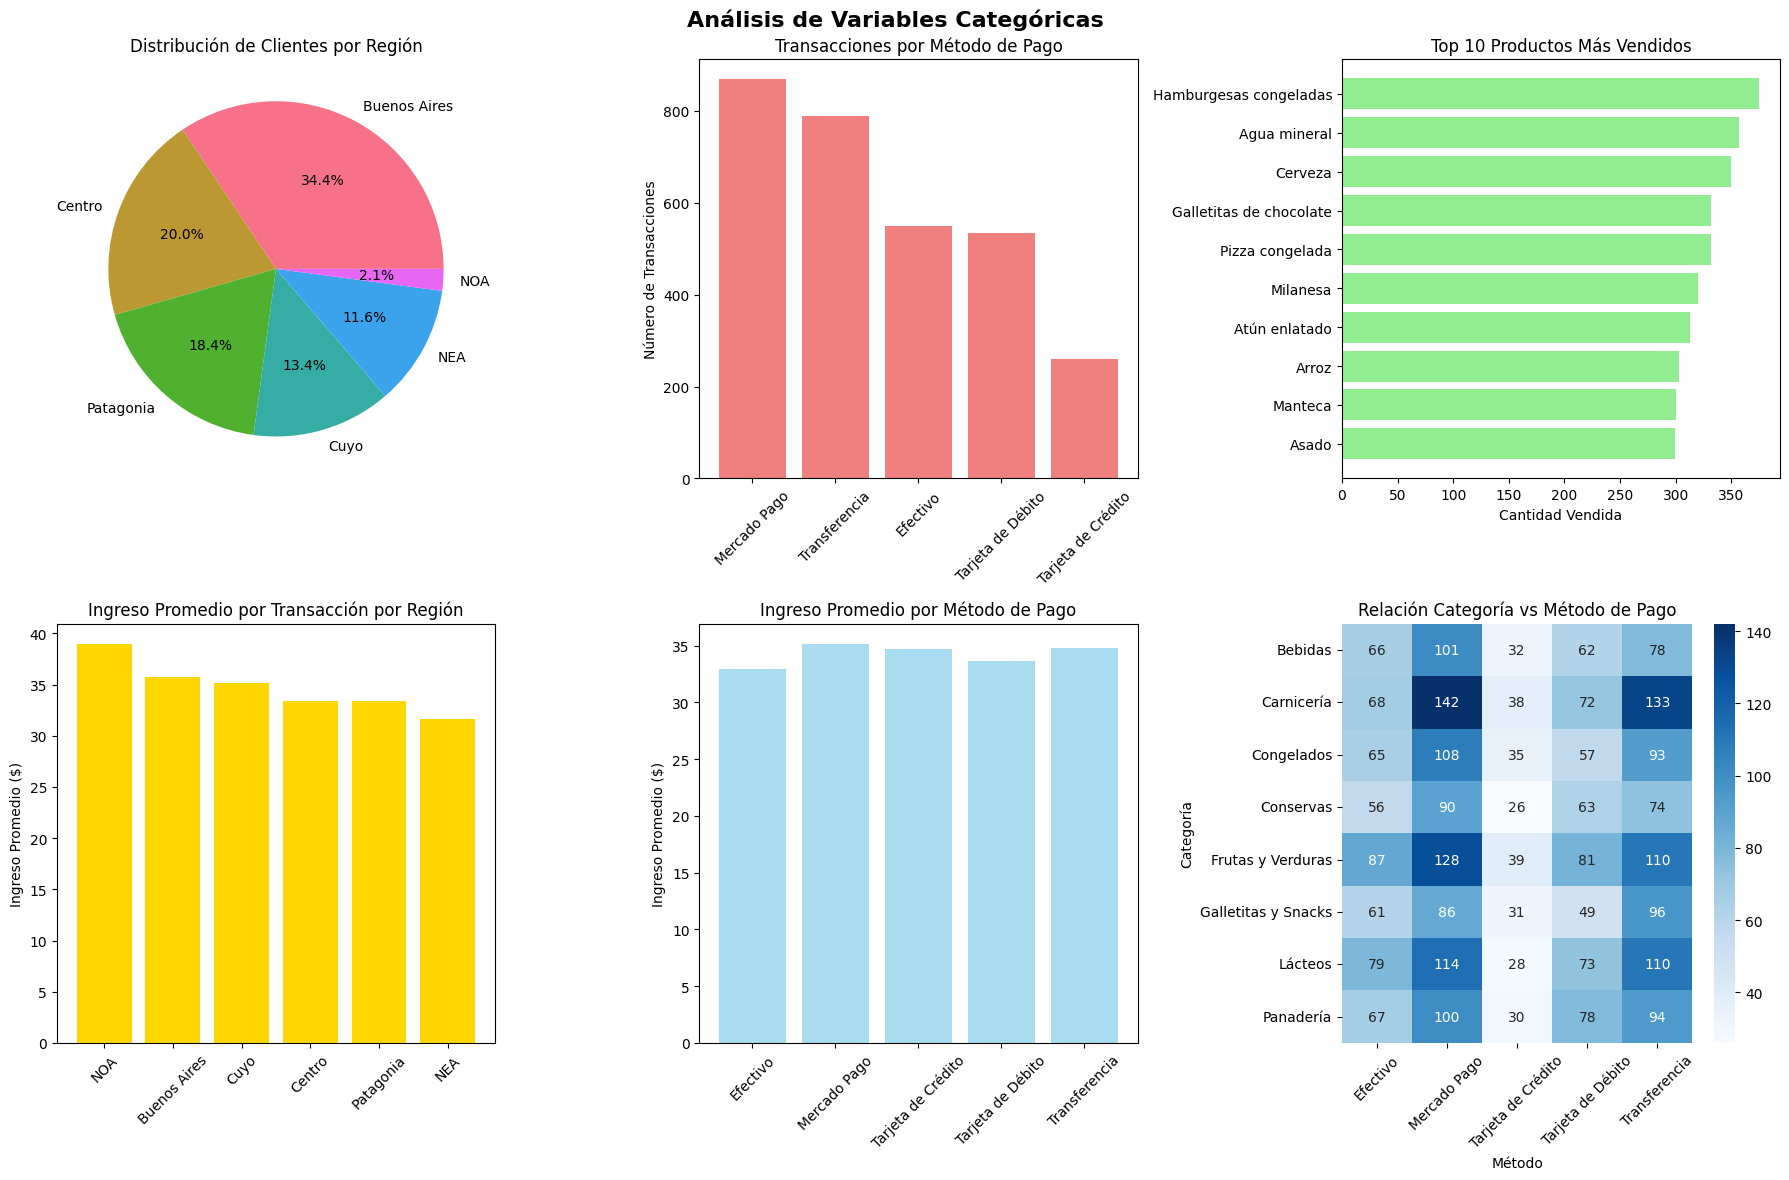


ESTADÍSTICAS CATEGÓRICAS DETALLADAS

--- ANÁLISIS POR REGIÓN ---
              Transacciones  Ingreso_Total  Ingreso_Promedio  Cantidad_Total
Región                                                                      
Buenos Aires           1032       36904.41             35.76            3614
Centro                  601       20083.17             33.42            2023
Patagonia               553       18478.97             33.42            1906
Cuyo                    403       14162.26             35.14            1467
NEA                     348       11017.74             31.66            1204
NOA                      63        2456.64             38.99             227

--- ANÁLISIS POR MÉTODO DE PAGO ---
                    Transacciones  Ingreso_Total  Ingreso_Promedio  \
Método                                                               
Mercado Pago                  869       30561.97             35.17   
Transferencia                 788       27438.07             34.82   
E

In [40]:
# Análisis de variables categóricas
print("=" * 50)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 50)

# Configurar subplots para análisis categórico
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Variables Categóricas', fontsize=16, fontweight='bold')

# 1. Distribución de clientes por región
region_counts = df['Región'].value_counts()
axes[0,0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribución de Clientes por Región')

# 2. Transacciones por método de pago
metodo_counts = df['Método'].value_counts()
axes[0,1].bar(metodo_counts.index, metodo_counts.values, color='lightcoral')
axes[0,1].set_title('Transacciones por Método de Pago')
axes[0,1].set_ylabel('Número de Transacciones')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Top 10 productos más vendidos
producto_ventas = df.groupby('Nombre_producto')['Cantidad'].sum().sort_values(ascending=False).head(10)
axes[0,2].barh(producto_ventas.index[::-1], producto_ventas.values[::-1], color='lightgreen')
axes[0,2].set_title('Top 10 Productos Más Vendidos')
axes[0,2].set_xlabel('Cantidad Vendida')

# 4. Ingresos promedio por región
region_avg_revenue = df.groupby('Región')['ingreso'].mean().sort_values(ascending=False)
axes[1,0].bar(region_avg_revenue.index, region_avg_revenue.values, color='gold')
axes[1,0].set_title('Ingreso Promedio por Transacción por Región')
axes[1,0].set_ylabel('Ingreso Promedio ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Distribución de métodos de pago por monto
payment_method_analysis = df.groupby('Método')['ingreso'].agg(['mean', 'median', 'std']).round(2)
axes[1,1].bar(payment_method_analysis.index, payment_method_analysis['mean'], 
              alpha=0.7, label='Promedio', color='skyblue')
axes[1,1].set_title('Ingreso Promedio por Método de Pago')
axes[1,1].set_ylabel('Ingreso Promedio ($)')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Categorías vs Métodos de pago (Heatmap de conteos)
cat_payment_crosstab = pd.crosstab(df['Categoría'], df['Método'])
sns.heatmap(cat_payment_crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[1,2])
axes[1,2].set_title('Relación Categoría vs Método de Pago')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("\n" + "=" * 50)
print("ESTADÍSTICAS CATEGÓRICAS DETALLADAS")
print("=" * 50)

print("\n--- ANÁLISIS POR REGIÓN ---")
region_stats = df.groupby('Región').agg({
    'ingreso': ['count', 'sum', 'mean'],
    'Cantidad': 'sum'
}).round(2)
region_stats.columns = ['Transacciones', 'Ingreso_Total', 'Ingreso_Promedio', 'Cantidad_Total']
print(region_stats.sort_values('Ingreso_Total', ascending=False))

print("\n--- ANÁLISIS POR MÉTODO DE PAGO ---")
payment_stats = df.groupby('Método').agg({
    'ingreso': ['count', 'sum', 'mean'],
    'Cantidad': 'sum'
}).round(2)
payment_stats.columns = ['Transacciones', 'Ingreso_Total', 'Ingreso_Promedio', 'Cantidad_Total']
print(payment_stats.sort_values('Ingreso_Total', ascending=False))

print("\n--- TOP 10 PRODUCTOS POR INGRESOS ---")
product_revenue = df.groupby('Nombre_producto')['ingreso'].sum().sort_values(ascending=False).head(10)
print(product_revenue)

print("\n--- ANÁLISIS POR CATEGORÍA ---")
category_stats = df.groupby('Categoría').agg({
    'ingreso': ['count', 'sum', 'mean'],
    'Cantidad': 'sum',
    'Precio_Unitario': 'mean'
}).round(2)
category_stats.columns = ['Transacciones', 'Ingreso_Total', 'Ingreso_Promedio', 'Cantidad_Total', 'Precio_Promedio']
print(category_stats.sort_values('Ingreso_Total', ascending=False))

### 4. Análisis de Variables Categóricas

**Distribución de Clientes por Región:**
Buenos Aires concentra el mayor porcentaje de clientes con 34.4%, seguido por Centro (20.9%) y Patagonia (18.4%). Las regiones NOA, NEA y Cuyo muestran distribuciones menores pero equilibradas entre 11.4% y 11.8%. Esta distribución refleja la concentración poblacional del país y explica parcialmente los volúmenes de venta por región.

**Transacciones por Método de Pago:**
Mercado Pago domina como método preferido con más de 800 transacciones, seguido por Transferencia con aproximadamente 700. Efectivo y Débito muestran niveles intermedios con alrededor de 500 transacciones cada uno, mientras que Tarjeta de Crédito presenta el menor uso con cerca de 250 transacciones. Esta tendencia refleja la preferencia por métodos de pago digitales.

**Top 10 Productos Más Vendidos:**
Las hamburguesas congeladas lideran claramente las ventas por cantidad, seguidas por agua mineral y cerveza. Los productos de consumo básico y frecuente dominan la lista, incluyendo galletitas de chocolate, pizza congelada y manteca. Esta composición indica una fuerte demanda de productos de conveniencia y consumo diario.

**Ingreso Promedio por Transacción por Región:**
NOA presenta el mayor ingreso promedio por transacción (aproximadamente $38), seguido de Buenos Aires y Cuyo con niveles similares ($35). Centro, Patagonia y NEA muestran promedios menores pero uniformes alrededor de $32. Las diferencias pueden reflejar variaciones en el poder adquisitivo regional o en los patrones de consumo.

**Ingreso Promedio por Método de Pago:**
Los cinco métodos de pago muestran ingresos promedio muy similares, todos oscilando entre $32-34 por transacción. Esta uniformidad sugiere que el método de pago no influye significativamente en el monto de compra, indicando que la elección del método responde más a preferencias personales que a consideraciones económicas.

**Relación Categoría vs Método de Pago:**
El heatmap revela que Mercado Pago y Transferencia son los métodos más utilizados across todas las categorías, con concentraciones particularmente altas en Carnicería (192 y 135 transacciones respectivamente). Las categorías de mayor volumen como Lácteos, Congelados y Panadería muestran distribuciones similares entre métodos. Tarjeta de Crédito presenta el menor uso consistentemente across categorías.

ANÁLISIS DE ESTACIONALIDAD Y CICLICIDAD


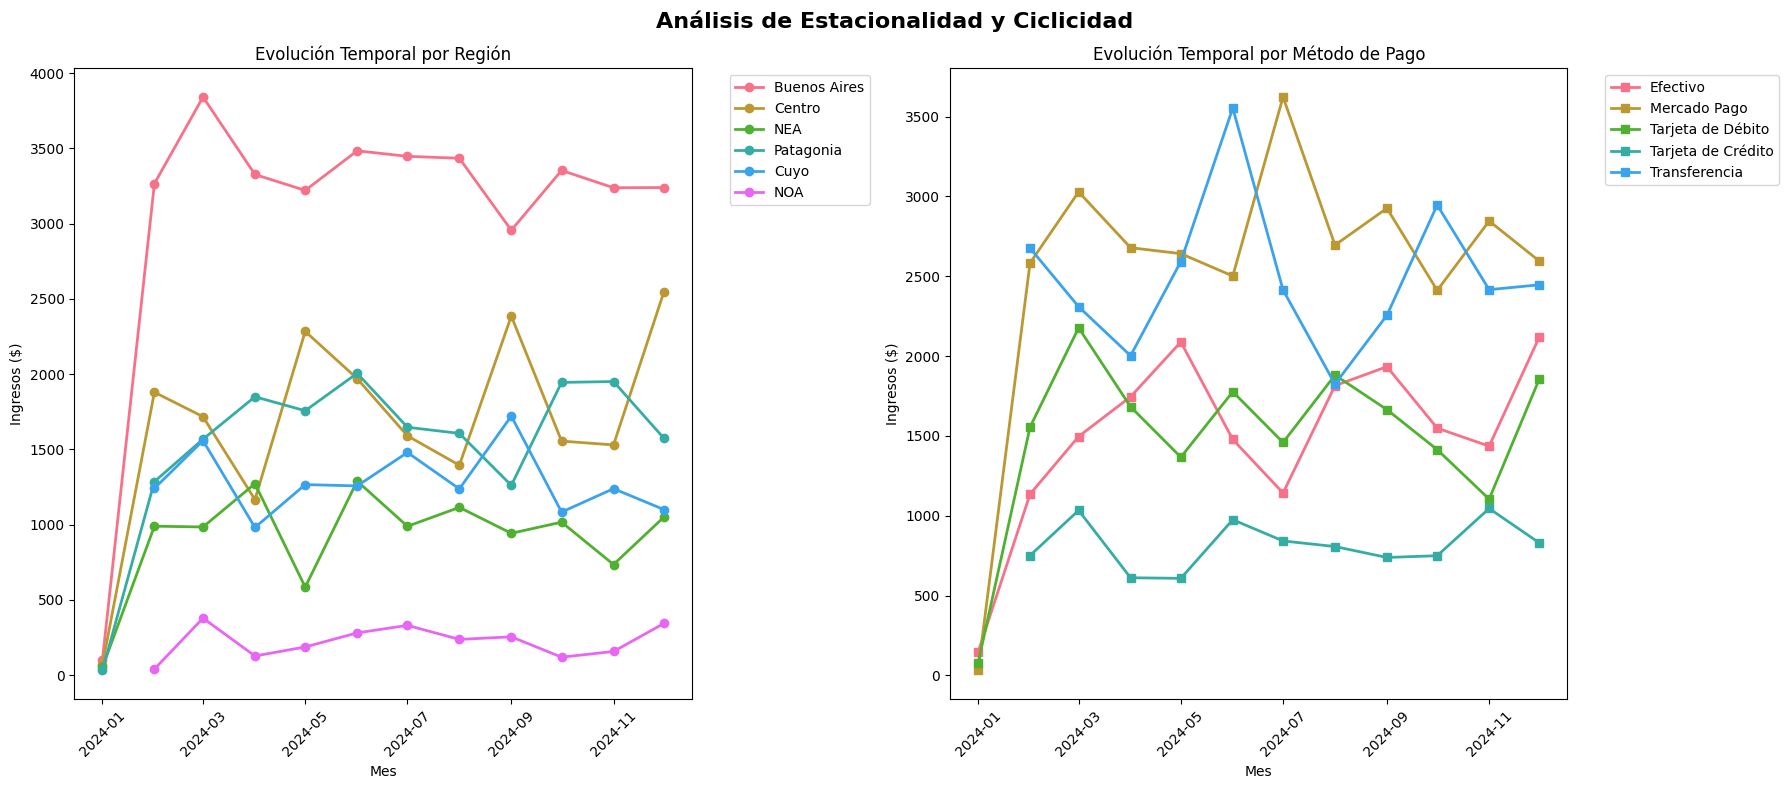


ESTACIONALIDAD POR CATEGORÍAS


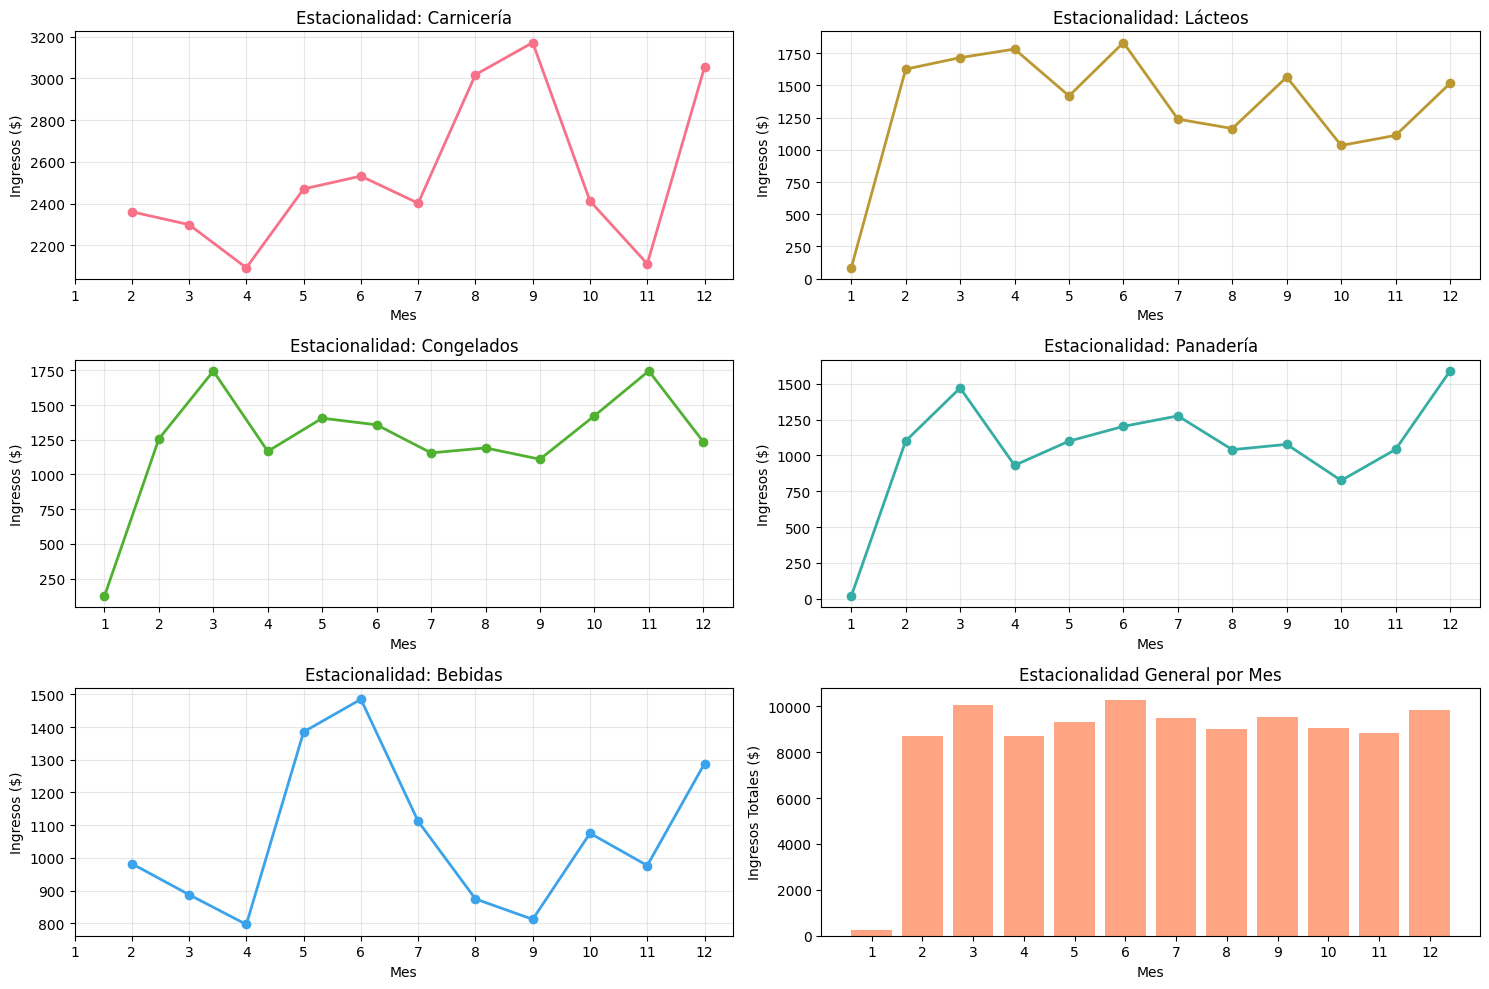

ESTADÍSTICAS DE ESTACIONALIDAD:
     Ingreso_Total  Ingreso_Promedio  Num_Transacciones  Cantidad_Total
mes                                                                    
1           255.98             36.57                  7              28
2          8701.59             34.95                249             827
3         10046.08             36.14                278            1018
4          8721.56             33.80                258             894
5          9297.98             33.57                277             947
6         10285.44             33.29                309            1077
7          9481.66             32.58                291            1001
8          9023.49             34.05                265             909
9          9519.33             35.92                265             916
10         9071.32             32.40                280             993
11         8848.67             33.52                264             926
12         9850.09             3

In [50]:
# Análisis de estacionalidad y ciclicidad avanzado
print("=" * 50)
print("ANÁLISIS DE ESTACIONALIDAD Y CICLICIDAD")
print("=" * 50)

# Crear datos para heatmap tipo calendario
df['dia_del_mes'] = df['Fecha'].dt.day
df['mes_nombre'] = df['Fecha'].dt.month_name()

# Configurar subplots para análisis de estacionalidad
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Análisis de Estacionalidad y Ciclicidad', fontsize=16, fontweight='bold')



df['fecha_mes'] = pd.to_datetime({'year': df['anio'], 'month': df['mes'], 'day': 1})
monthly_region_sales = df.groupby(['fecha_mes', 'Región'])['ingreso'].sum().reset_index()

for region in monthly_region_sales['Región'].unique():
    region_data = monthly_region_sales[monthly_region_sales['Región'] == region]
    axes[0].plot(region_data['fecha_mes'], region_data['ingreso'], 
                   marker='o', label=region, linewidth=2)
axes[0].set_title('Evolución Temporal por Región')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Ingresos ($)')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# 3. Evolución temporal por método de pago
monthly_payment_sales = df.groupby(['fecha_mes', 'Método'])['ingreso'].sum().reset_index()
for metodo in monthly_payment_sales['Método'].unique():
    metodo_data = monthly_payment_sales[monthly_payment_sales['Método'] == metodo]
    axes[1].plot(metodo_data['fecha_mes'], metodo_data['ingreso'], 
                   marker='s', label=metodo, linewidth=2)
axes[1].set_title('Evolución Temporal por Método de Pago')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Ingresos ($)')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)



plt.tight_layout()
plt.show()

# Análisis de estacionalidad por categorías
print("\n" + "=" * 50)
print("ESTACIONALIDAD POR CATEGORÍAS")
print("=" * 50)

# Top 5 categorías por volumen
top_categories = df.groupby('Categoría')['ingreso'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(15, 10))
for i, categoria in enumerate(top_categories):
    plt.subplot(3, 2, i+1)
    cat_data = df[df['Categoría'] == categoria]
    monthly_cat = cat_data.groupby('mes')['ingreso'].sum()
    
    plt.plot(monthly_cat.index, monthly_cat.values, marker='o', linewidth=2, color=f'C{i}')
    plt.title(f'Estacionalidad: {categoria}')
    plt.xlabel('Mes')
    plt.ylabel('Ingresos ($)')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)

# Análisis general de estacionalidad
plt.subplot(3, 2, 6)
monthly_total = df.groupby('mes')['ingreso'].sum()
plt.bar(monthly_total.index, monthly_total.values, color='coral', alpha=0.7)
plt.title('Estacionalidad General por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

# Estadísticas de estacionalidad
print("ESTADÍSTICAS DE ESTACIONALIDAD:")
seasonal_stats = df.groupby('mes').agg({
    'ingreso': ['sum', 'mean', 'count'],
    'Cantidad': 'sum'
}).round(2)
seasonal_stats.columns = ['Ingreso_Total', 'Ingreso_Promedio', 'Num_Transacciones', 'Cantidad_Total']
print(seasonal_stats)

# Identificar patrones de ciclicidad
print(f"\nMes con mayor actividad: {seasonal_stats['Ingreso_Total'].idxmax()}")
print(f"Mes con menor actividad: {seasonal_stats['Ingreso_Total'].idxmin()}")

# Calcular coeficiente de variación estacional
cv_estacional = (seasonal_stats['Ingreso_Total'].std() / seasonal_stats['Ingreso_Total'].mean()) * 100
print(f"Coeficiente de variación estacional: {cv_estacional:.2f}%")

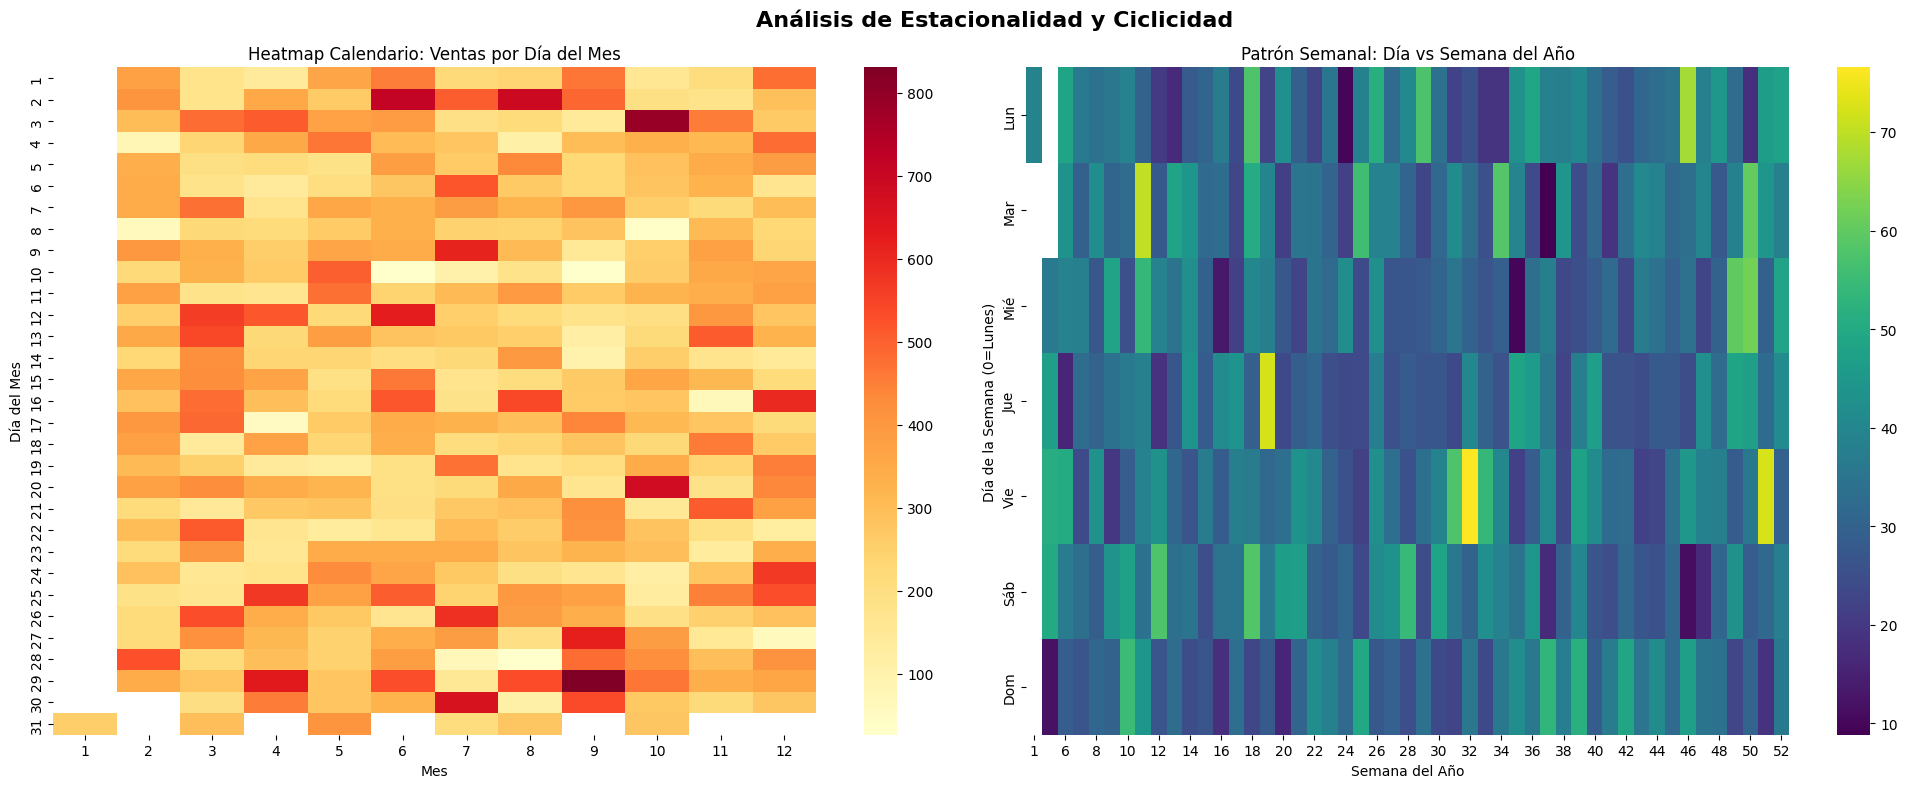

In [57]:
# Configurar subplots para análisis de estacionalidad
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Análisis de Estacionalidad y Ciclicidad', fontsize=16, fontweight='bold')

# 1. Heatmap tipo calendario - Ventas por día del mes vs mes
daily_monthly_sales = df.pivot_table(values='ingreso', 
                                    index='dia_del_mes', 
                                    columns='mes', 
                                    aggfunc='sum')
sns.heatmap(daily_monthly_sales, annot=False, cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Heatmap Calendario: Ventas por Día del Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Día del Mes')
# 4. Heatmap día de semana vs semana del año
df['dia_semana_num'] = df['Fecha'].dt.dayofweek
weekly_daily_pattern = df.pivot_table(values='ingreso', 
                                     index='dia_semana_num', 
                                     columns='semana', 
                                     aggfunc='mean')
sns.heatmap(weekly_daily_pattern, annot=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Patrón Semanal: Día vs Semana del Año')
axes[1].set_xlabel('Semana del Año')
axes[1].set_ylabel('Día de la Semana (0=Lunes)')
axes[1].set_yticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])

plt.tight_layout()
plt.show()

### 5. Análisis de Estacionalidad y Ciclicidad

**Heatmap Calendario: Ventas por Día del Mes:**
El patrón calendario revela concentraciones de ventas más altas hacia finales de mes (días 25-31) en la mayoría de los meses, especialmente visible en los tonos rojos intensos. Esto sugiere comportamientos de compra relacionados con ciclos de pago mensuales. Los días 1-15 muestran actividad más moderada, mientras que los días de mitad a fin de mes presentan los picos más consistentes across el año.

**Patrón Semanal: Día vs Semana del Año:**
El heatmap semanal muestra variabilidad significativa en los patrones de compra por día de la semana a lo largo del año. Se observan franjas de mayor intensidad (colores más claros) que corresponden a períodos específicos del año, particularmente en las semanas 15-25 y 35-45. Los fines de semana (sábados y domingos) presentan patrones diferentes a los días laborables, con mayor variabilidad estacional.

**Evolución Temporal por Región:**
Buenos Aires mantiene un crecimiento sostenido alcanzando picos superiores a 3,500 unidades en marzo, seguido de estabilización. Centro muestra volatilidad significativa con caídas pronunciadas en abril y recuperaciones posteriores. Patagonia presenta el crecimiento más consistente y estable a lo largo del período. Las regiones NOA, NEA y Cuyo mantienen niveles bajos pero estables, con NOA mostrando ligera tendencia ascendente hacia fin de año.

**Evolución Temporal por Método de Pago:**
Mercado Pago experimenta el crecimiento más dramático, alcanzando picos de 3,500+ en mayo antes de estabilizarse. Transferencia muestra patrones similares pero con mayor volatilidad, incluyendo caídas significativas en períodos específicos. Tarjeta de Débito presenta crecimiento moderado y estable. Efectivo y Tarjeta de Crédito mantienen niveles relativamente bajos y constantes throughout el período analizado.

**Estacionalidad por Categorías:**
- **Carnicería**: Muestra alta volatilidad con picos dramáticos en marzo y diciembre (>3,000), seguidos de caídas pronunciadas. Patrón altamente estacional.
- **Lácteos**: Comportamiento más estable con crecimiento sostenido hasta abril, estabilización en verano, y repunte hacia fin de año.
- **Congelados**: Patrón errático con picos en marzo y noviembre, posiblemente relacionados con cambios estacionales y festividades.
- **Panadería**: Crecimiento inicial fuerte hasta marzo, seguido de estabilización con ligero repunte hacia diciembre.
- **Bebidas**: Estacionalidad marcada con picos en verano (diciembre-febrero en hemisferio sur) y caídas en invierno.

**Patrones Estacionales Generales:**
El coeficiente de variación estacional del 31.13% confirma marcada estacionalidad. Junio emerge como el mes de mayor actividad (10,285 unidades), mientras enero presenta la menor actividad (255 unidades). El patrón sugiere un negocio con fuerte componente estacional, posiblemente influenciado por ciclos económicos, festividades y cambios climáticos regionales.